### Heap initialisation

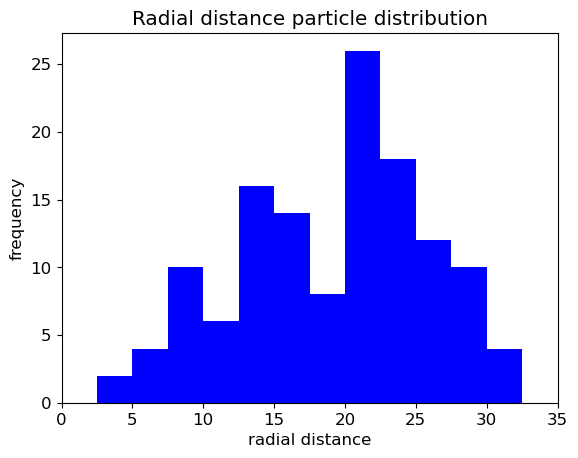

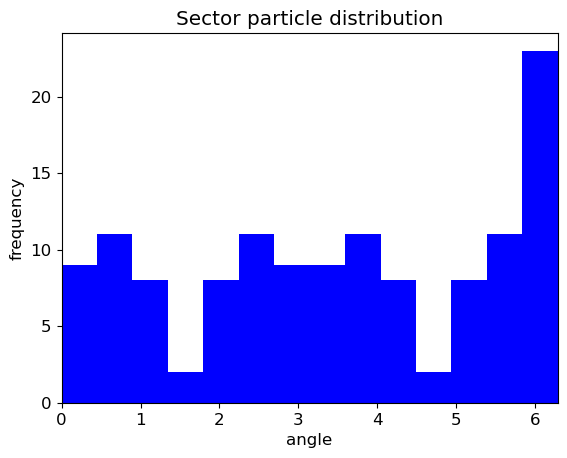

In [7]:
# This simulates the collisions of many particles in a circular domain and calculates entropy. See the readme file for further description
# Note some minor changes have been made from the original code used in the assigment in 2020.
#
# Author: Timothy Lapuz

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import animation
from itertools import combinations
from matplotlib.animation import FuncAnimation
import math
import heapq


# Let us first initialise some particles, radius 1. Suppose they are confined on a radius 100 circle, with origin at (0,0)
radius = 1.25
R = 35

#######################################################
x = [-28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -28.0, -24.0, -20.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0,
     -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0,
     -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0, -16.0, -12.0, -8.0, -4.0, 4.0, 8.0, 12.0, 16.0]


y = [-12.0]*14 + [-8.0]*14 + [-4.0]*14 + [0.0]*14 + [4.0]*14 + [8.0]*14 + [12.0]*14 + [-16.0]*8 + [-20.0]*8 + [16.0]*8 +  [20.0]*8
np.random.seed(0)
vx = np.random.rand(len(x))
np.random.seed(42)
vy = np.random.rand(len(x))

collide= 3500
L_length = len(x) + 1

# Initialise a heap
H = []
heapq.heapify(H)

# Last time each particle collided with something
L = [-1]*L_length # Initialise negative numbers

# Store initial time
t = 0
###################################################################
# Particle collisions
for j in range(0,len(x),1):
    for i in range(j+1,len(x),1):
        
        # Calculating all collision times
        r_rel_vecx = x[i] - x[j]
        r_rel_vecy = y[i] - y[j]
        v_rel_vecx = vx[i] - vx[j]
        v_rel_vecy = vy[i] - vy[j]
        
        
        # We now calculate collision times
        numer =  r_rel_vecx**2 + r_rel_vecy**2 - (2*radius)**2
        
        # Terms in denominator
        product = r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy
        velocity_rel_sq = v_rel_vecx**2 + v_rel_vecy**2
        
        # Conditions
        if product**2 - numer*velocity_rel_sq <  0.00001: # Need positive discriminant
            continue
        elif r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy >  0.00001: # Need to come towards each other
            continue
        else:
            # Denominator
            denom = -product + (product**2 - numer*velocity_rel_sq)**(1/2)
        
        # Time increment
        delta_t = numer/denom
        
        
        # Absolute time entered into the heap
        tau = t
        abs_time = tau + delta_t
        
        # Record, convert to heap, then add to heap
        H_add = (abs_time,tau,i,j)
        heapq.heappush(H,H_add)
        
# Wall collisions        
for k in range(0,len(x),1):        
    # Now we calculate wall collision times for each particle k
    
    # Calculate some things
    position_sq = x[k]**2 + y[k]**2
    velocity_sq = vx[k]**2 + vy[k]**2
    product_wall = x[k]*vx[k] + y[k]*vy[k]
    
    
    # Now get the solution
    numer_wall = -product_wall +(product_wall**2 + ((R-radius)**2-position_sq)*velocity_sq)**(1/2)
    denom_wall = velocity_sq
    
    if denom_wall < 0.00001:
        continue
    else:
        delta_t = numer_wall/denom_wall

        # Absolute time entered into the heap
        tau = t
        abs_time = tau  + delta_t

        # Record, convert to heap, then add to heap
        H_add = (abs_time,tau,k,len(x))
        heapq.heappush(H,H_add)
        
time = [0]
time_1 = []
energy = []

s_angle_total = []
s_radial_total = []


 # Bucketing
# Get radius
radial = []
buckets = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
for w in range(0,len(x),1):
        
    radial1 = math.sqrt(x[w]**2+y[w]**2)
    radial.append(radial1)
    
    for q in range(0,14,1):
        if radial1 > q*2.5 and radial1 < (q+1)*2.5:
            buckets[q] += 1

                
# Bucketing - sectors
angle = []
buckets_sect = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
for w in range(0,len(x),1):
    # First find, the sector
    if x[w] > 0 and y[w] > 0:
        angle_trial = math.atan(y[w]/x[w])
        angle1 = angle_trial
    elif x[w] < 0 and y[w] > 0:
        x_val = abs(x[w])
        angle_trial = math.atan(y[w]/x_val)
        angle1 = math.pi - angle_trial
    elif x[w] < 0 and y[w] < 0:
        x_val = abs(x[w])
        y_val = abs(y[w])
        angle_trial = math.atan(y_val/x_val)
        angle1 = math.pi + angle_trial
    else: 
        y_val = abs(y[w])
        angle_trial = math.atan(y_val/x[w])
        angle1 = 2*math.pi-1.0*angle_trial
            
    angle.append(angle1) 
    
    for q in range(0,14,1):
        if angle1 > float(q)*2.0*math.pi/14.0 and angle1 < (float(q)+1.0)*2.0*math.pi/14.0:
            buckets_sect[q] += 1
    
# Calulate probabilities
prob_radial = []
total_area = math.pi*R**2
for w in range(0,14,1):
    area_current = math.pi*(float(w+1)*2.5)**2 - math.pi*(float(w)*2.5)**2
    prob_current = area_current/total_area
    prob_radial.append(prob_current)

# Sectioning
prob_sect = 1.0/14.0
    
# Entropy calculations
s_radial = 0
s_angle = 0
for q in range(0,14,1):
    freq_sect = float(buckets_sect[q])/float(len(x))
    freq_radial = float(buckets[q])/float(len(x))
    
    if freq_radial < 0.000001:
        freq_radial = 0.000001
    if freq_sect < 0.000001:
        freq_sect = 0.000001
    
    s_radial_current = -1.0*freq_radial*math.log(freq_radial/prob_radial[q])
    s_radial += s_radial_current
    
    s_angle_current = -1.0*freq_sect*math.log(freq_sect/prob_sect)
    s_angle += s_angle_current
    
s_angle_total.append(s_angle)
s_radial_total.append(s_radial)
       
# Plots for radial bins
list_bins = np.arange(0,37.5,2.5)
# the histogram of the data
n, bins, patches = plt.hist(radial,bins = list_bins, facecolor='blue')
plt.rcParams.update({'font.size': 12})
plt.title('Radial distance particle distribution')
plt.xlim([0,35])
plt.xlabel('radial distance')
plt.ylabel('frequency')
#plt.savefig("radial_entropy.jpg")
plt.show()

list_bins = np.arange(0, 2.0*math.pi + 2.0*math.pi/14.0,2.0*math.pi/14.0)
# the histogram of the data
n, bins, patches = plt.hist(angle,list_bins, facecolor='blue')
plt.rcParams.update({'font.size': 12})
plt.title('Sector particle distribution')
plt.xlim([0,6.28])
plt.xlabel('angle')
plt.ylabel('frequency')
#plt.savefig("angle_entropy.jpg")
plt.show()


### Iterations

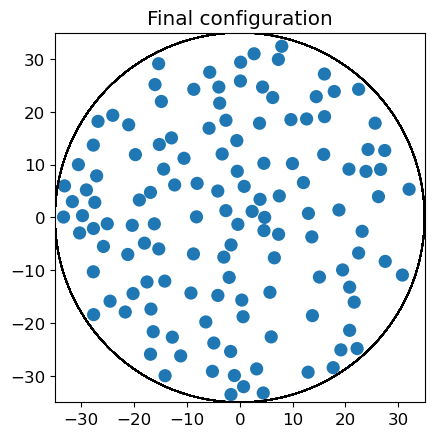

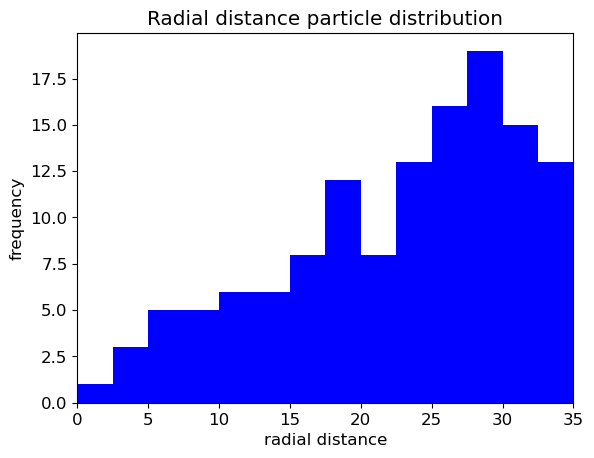

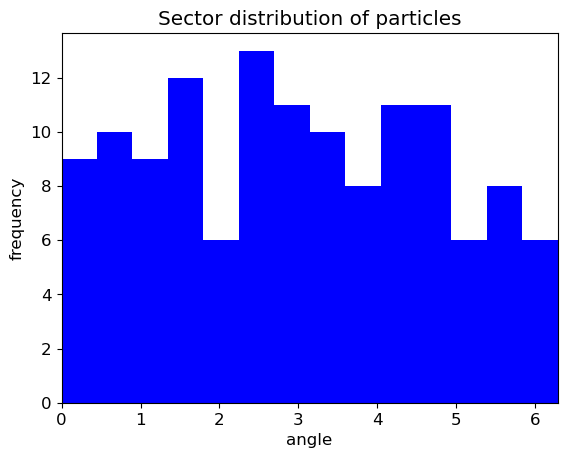

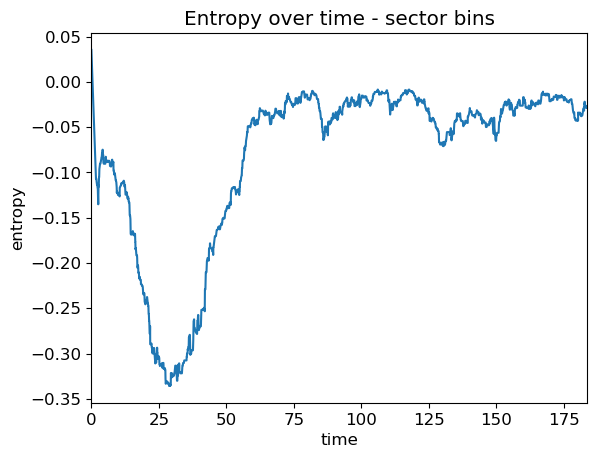

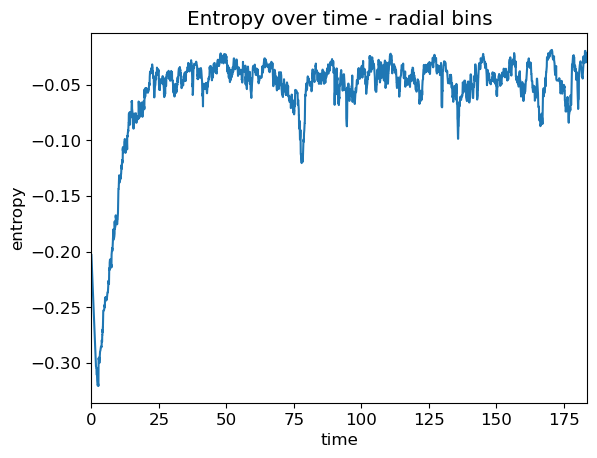

In [8]:
###############################################################
### This part is moving the particles forward in time
for n in range(0,collide,1):

    # Get the first thing in the heap (abs_time,tau_wall,i,j), i>j
    current = heapq.heappop(H)

    # Testing
    test_1 = current[2]
    test_2 = current[3]

    while L[test_1] > current[1] or  L[test_2] > current[1]:
        current = heapq.heappop(H)
        test_1 = current[2]
        test_2 = current[3]
    
    # Get time
    time.append(current[0])
    time_1.append(current[0])
    #print(time)
  

    # Particle one is the wall if it is a wall collision, otherwise we want i>j
    if current[2] == len(x):
        particle_one = current[2]
        particle_two = current[3]
    elif current[3] == len(x):
        particle_one = current[3]
        particle_two = current[2]
    elif current[2] > current[3]:
        particle_one = current[2]
        particle_two = current[3]
    else:
        particle_one = current[3]
        particle_two = current[2]

    # Put particles in one list
    particle_list = [particle_one, particle_two]

    # Run the trajectories up to the current time
    for l in range(0,len(x),1):
        x[l] = x[l] + vx[l]*(time[n+1]-time[n])
        y[l] = y[l] + vy[l]*(time[n+1]-time[n])


    # Calculate the new trajectory of the particles after collision. Check first if it is with the call and 
    # calculate accordingly
    if particle_one == len(x):
        product_heap_wall = x[particle_two]*vx[particle_two] + y[particle_two]*vy[particle_two]
        vx[particle_two] = vx[particle_two] - 2/((R-radius)**2)*product_heap_wall*x[particle_two]
        vy[particle_two] = vy[particle_two] - 2/((R-radius)**2)*product_heap_wall*y[particle_two]

    else:
        # Calculate a few things first
        r_bar_x = (x[particle_one] - x[particle_two])/(2*radius)
        r_bar_y = (y[particle_one] - y[particle_two])/(2*radius)
        product_heap = r_bar_x*(vx[particle_one] - vx[particle_two])+ r_bar_y*(vy[particle_one] - vy[particle_two])
        Px = product_heap*r_bar_x
        Py = product_heap*r_bar_y

        # Then calculate new particle velocities
        vx[particle_one] = vx[particle_one] - Px
        vy[particle_one] = vy[particle_one] - Py
        vx[particle_two] = vx[particle_two] + Px
        vy[particle_two] = vy[particle_two] + Py

    # Update L
    if particle_one == len(x):   
        L[particle_two] = time[n+1]
    else:
        L[particle_one] = time[n+1]
        L[particle_two] = time[n+1]

    #####################################################################################
    ### New entries in heap for the particles that have collided

    if particle_one == len(x):
        
        # Particle collisions
        j = particle_two
        for i in range(j+1,len(x),1):

            # Calculating all collision times
            r_rel_vecx = x[i] - x[j]
            r_rel_vecy = y[i] - y[j]
            v_rel_vecx = vx[i] - vx[j]
            v_rel_vecy = vy[i] - vy[j]


            # We now calculate collision times
            numer =  r_rel_vecx**2 + r_rel_vecy**2 - (2*radius)**2

            # Terms in denominator
            product = r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy
            velocity_rel_sq = v_rel_vecx**2 + v_rel_vecy**2

            # Conditions
            if product**2 - numer*velocity_rel_sq <  0.00001: # Need positive discriminant
                continue
            elif r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy >  0.00001: # Need to come towards each other
                continue
            else:
                # Denominator
                denom = -product + (product**2 - numer*velocity_rel_sq)**(1/2)

            # Time increment
            delta_t = numer/denom


            # Absolute time entered into the heap
            tau = time[n+1]
            abs_time = tau + delta_t

            # Record, convert to heap, then add to heap
            H_add = (abs_time,tau,i,j)
            heapq.heappush(H,H_add)


        for i in range(0,j,1):

            # Calculating all collision times
            r_rel_vecx = x[j] - x[i]
            r_rel_vecy = y[j] - y[i]
            v_rel_vecx = vx[j] - vx[i]
            v_rel_vecy = vy[j] - vy[i]


            # We now calculate collision times
            numer =  r_rel_vecx**2 + r_rel_vecy**2 - (2*radius)**2

            # Terms in denominator
            product = r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy
            velocity_rel_sq = v_rel_vecx**2 + v_rel_vecy**2

            # Conditions
            if product**2 - numer*velocity_rel_sq <  0.00001: # Need positive discriminant
                continue
            elif r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy >  0.00001: # Need to come towards each other
                continue
            else:
                # Denominator
                denom = -product + (product**2 - numer*velocity_rel_sq)**(1/2)

            # Time increment
            delta_t = numer/denom


            # Absolute time entered into the heap
            tau = time[n+1]
            abs_time = tau + delta_t

            # Record, convert to heap, then add to heap
            H_add = (abs_time,tau,j,i)
            heapq.heappush(H,H_add)


        # Wall collisions        
        k = particle_two

        # Now we calculate wall collision times for each particle k

        # Calculate some things
        position_sq = x[k]**2 + y[k]**2
        velocity_sq = vx[k]**2 + vy[k]**2
        product_wall = x[k]*vx[k] + y[k]*vy[k]


        # Now get the solution
        numer_wall = -product_wall + (product_wall**2 + ((R-radius)**2-position_sq)*velocity_sq)**(1/2)
        denom_wall = velocity_sq

        if denom_wall < 0.00001:
            pass
        else:
            delta_t = numer_wall/denom_wall

            # Absolute time entered into the heap
            tau = time[n+1]
            abs_time = tau + delta_t

            # Record, convert to heap, then add to heap
            H_add = (abs_time,tau,len(x),k)
            heapq.heappush(H,H_add)

    else:
        # Particle collisions
        for j in particle_list:
            for i in range(j+1,len(x),1):

                # Calculating all collision times
                r_rel_vecx = x[i] - x[j]
                r_rel_vecy = y[i] - y[j]
                v_rel_vecx = vx[i] - vx[j]
                v_rel_vecy = vy[i] - vy[j]


                # We now calculate collision times
                numer =  r_rel_vecx**2 + r_rel_vecy**2 - (2*radius)**2

                # Terms in denominator
                product = r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy
                velocity_rel_sq = v_rel_vecx**2 + v_rel_vecy**2

                # Conditions
                if product**2 - numer*velocity_rel_sq <  0.00001: # Need positive discriminant
                    continue
                elif r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy >  0.00001: # Need to come towards each other
                    continue
                else:
                    # Denominator
                    denom = -product + (product**2 - numer*velocity_rel_sq)**(1/2)

                # Time increment
                delta_t = numer/denom


                # Absolute time entered into the heap
                tau = time[n+1]
                abs_time = tau + delta_t

                # Record, convert to heap, then add to heap
                H_add = (abs_time,tau,i,j)
                heapq.heappush(H,H_add)


            for i in range(0,j,1):

                # Calculating all collision times
                r_rel_vecx = x[j] - x[i]
                r_rel_vecy = y[j] - y[i]
                v_rel_vecx = vx[j] - vx[i]
                v_rel_vecy = vy[j] - vy[i]


                # We now calculate collision times
                numer =  r_rel_vecx**2 + r_rel_vecy**2 - (2*radius)**2

                # Terms in denominator
                product = r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy
                velocity_rel_sq = v_rel_vecx**2 + v_rel_vecy**2

                # Conditions
                if product**2 - numer*velocity_rel_sq <  0.00001: # Need positive discriminant
                    continue
                elif r_rel_vecx*v_rel_vecx + r_rel_vecy*v_rel_vecy >  0.00001: # Need to come towards each other
                    continue
                else:
                    # Denominator
                    denom = -product + (product**2 - numer*velocity_rel_sq)**(1/2)

                # Time increment
                delta_t = numer/denom


                # Absolute time entered into the heap
                tau = time[n+1]
                abs_time = tau + delta_t

                # Record, convert to heap, then add to heap
                H_add = (abs_time,tau,j,i)
                heapq.heappush(H,H_add)



        # Wall collisions        
        for k in particle_list:

            # Now we calculate wall collision times for each particle k

            # Calculate some things
            position_sq = x[k]**2 + y[k]**2
            velocity_sq = vx[k]**2 + vy[k]**2
            product_wall = x[k]*vx[k] + y[k]*vy[k]


            # Now get the solution
            numer_wall = -product_wall + (product_wall**2 + ((R-radius)**2-position_sq)*velocity_sq)**(1/2)
            denom_wall = velocity_sq

            if denom_wall < 0.00001:
                pass
            else:
                delta_t = numer_wall/denom_wall

                # Absolute time entered into the heap
                tau = time[n+1]
                abs_time = tau + delta_t

                # Record, convert to heap, then add to heap
                H_add = (abs_time,tau,len(x),k)
                heapq.heappush(H,H_add)
                
                
    # Energy
    # Initialise as zero each iteration
    energy_total = 0
    
    # Add all kinetic energy of particles
    for num in range(0,len(x),1):
        energy_current = 0.5*vx[num]**2 + 0.5*vy[num]**2
        energy_total = energy_total + energy_current
    
    # Record
    energy.append(energy_total)
    
    if n == collide-1:
        fig, ax = plt.subplots()
        ax.cla()
        ax.set_xlim((-R, R))
        ax.set_ylim((-R, R))
        ax.set_aspect('equal',adjustable='box')
        plt.rcParams.update({'font.size': 12})
        #fig.set_size_inches(15, 15)
        for p in range(0,len(x),1):
            ax.add_artist(plt.Circle((x[p],y[p]),radius))
            ax.add_artist(plt.Circle((0,0),R,fill = False))
        plt.title("Final configuration")
        #plt.savefig("Final_entropy.jpg")
        plt.show()
        
    # Bucketing
    # Get radius
    radial = []
    buckets = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
    for w in range(0,len(x),1):
        
        radial1 = math.sqrt(x[w]**2+y[w]**2)
        radial.append(radial1)
    
        for q in range(0,14,1):
            if radial1 > q*2.5 and radial1 < (q+1)*2.5:
                buckets[q] += 1
                
    # Bucketing - sectors
    angle = []
    buckets_sect = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0}
    for w in range(0,len(x),1):
        # First find, the sector
        if x[w] > 0 and y[w] > 0:
            angle_trial = math.atan(y[w]/x[w])
            angle1 = angle_trial
        elif x[w] < 0 and y[w] > 0:
            x_val = abs(x[w])
            angle_trial = math.atan(y[w]/x_val)
            angle1 = math.pi - angle_trial
        elif x[w] < 0 and y[w] < 0:
            x_val = abs(x[w])
            y_val = abs(y[w])
            angle_trial = math.atan(y_val/x_val)
            angle1 = math.pi + angle_trial
        else: 
            y_val = abs(y[w])
            angle_trial = math.atan(y_val/x[w])
            angle1 = 2*math.pi-1.0*angle_trial
            
        angle.append(angle1) 
    
        for q in range(0,14,1):
            if angle1 > float(q)*2.0*math.pi/14.0 and angle1 < (float(q)+1.0)*2.0*math.pi/14.0:
                buckets_sect[q] += 1
    
    # Calulate probabilities
    prob_radial = []
    total_area = math.pi*R**2
    for w in range(0,14,1):
        area_current = math.pi*(float(w+1)*2.5)**2 - math.pi*(float(w)*2.5)**2
        prob_current = area_current/total_area
        prob_radial.append(prob_current)

    prob_sect = 1.0/14.0

    # Entropy calculations
    s_radial = 0
    s_angle = 0
    for q in range(0,14,1):
        freq_sect = float(buckets_sect[q])/float(len(x))
        freq_radial = float(buckets[q])/float(len(x))
        
        if freq_radial < 0.000001:
            freq_radial = 0.000001
        if freq_sect < 0.000001:
            freq_sect = 0.000001
            

        s_radial_current = -1.0*freq_radial*math.log(freq_radial/prob_radial[q])
        s_radial += s_radial_current

        s_angle_current = -1.0*freq_sect*math.log(freq_sect/prob_sect)
        s_angle += s_angle_current

    s_angle_total.append(s_angle)
    s_radial_total.append(s_radial)
    
list_bins = np.arange(0,37.5,2.5)
# the histogram of the data
n, bins, patches = plt.hist(radial,bins = list_bins, facecolor='blue')
plt.rcParams.update({'font.size': 12})
plt.title('Radial distance particle distribution')
plt.xlim([0,35])
plt.xlabel('radial distance')
plt.ylabel('frequency')
#plt.savefig("radial_entropy_end.jpg")
plt.show()

list_bins = np.arange(0, 2.0*math.pi + 2.0*math.pi/14.0,2.0*math.pi/14.0)
# the histogram of the data
n, bins, patches = plt.hist(angle,list_bins, facecolor='blue')
plt.rcParams.update({'font.size': 12})
plt.title('Sector distribution of particles')
plt.xlim([0,6.28])
plt.xlabel('angle')
plt.ylabel('frequency')
#plt.savefig("angle_entropy_end.jpg")
plt.show()

# Plots
fig, ax = plt.subplots()
#ax.cla()
ax.set_xlim((0, time[-1]))
#ax.set_ylim((0, 110))
#ax.set_aspect('equal',adjustable='box')
plt.rcParams.update({'font.size': 12})
#fig.set_size_inches(10, 10)
plt.plot(time, s_angle_total)
plt.xlabel('time')
plt.ylabel('entropy')
plt.title("Entropy over time - sector bins")
#plt.savefig("entropy_sect.jpg")
plt.show()

# Plots
fig, ax = plt.subplots()
#ax.cla()
ax.set_xlim((0, time[-1]))
#ax.set_ylim((0, 110))
#ax.set_aspect('equal',adjustable='box')
plt.rcParams.update({'font.size': 12})
#fig.set_size_inches(10, 10)
plt.plot(time, s_radial_total)
plt.xlabel('time')
plt.ylabel('entropy')
plt.title("Entropy over time - radial bins")
#plt.savefig("entropy_rad.jpg")
plt.show()